In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from simulations import *

In [3]:
segs = simulate_segment(coverage = 100, w = 1, dt = 10, purity = 0.8)

In [4]:
segs

,id,start,end,len,coverage,SNP,SNV,purity,Major_1,minor_1,Major_2,minor_2,ccf,type
0,0,0.0,5534316.0,5534316.0,100,1844,177,0.8,2,2,2,2,0.7,sub-clonal
1,1,5534316.0,5901095.0,366779.0,100,122,7,0.8,1,1,2,1,0.6,sub-clonal
2,2,5901095.0,18053130.0,12152035.0,100,4050,356,0.8,2,2,2,2,0.6,sub-clonal
3,3,18053130.0,19995327.0,1942197.0,100,647,55,0.8,1,0,1,0,0.9,sub-clonal
4,4,19995327.0,49999999.0,30004672.0,100,10001,944,0.8,1,0,1,1,0.1,sub-clonal


In [5]:
def simulate_data(segs):
    SNV = pd.DataFrame()
    SNP = pd.DataFrame()
    for _, row in segs.iterrows():

        if row.type == 'clonal':
            snp = simulate_SNPs_clonal(row)
            snv = simulate_SNVs_clonal(row)
        
        else:
            try:
                snp = simulate_SNPs_subclonal(row)
                snv = simulate_SNVs_subclonal(row)
            except:
                pass
        
        SNP =  pd.concat([SNP,snp], axis=0)
        SNV =  pd.concat([SNV,snv], axis=0)
        
        SNP = SNP.reset_index(drop=True)
        SNV = SNV.reset_index(drop=True)
    return SNP, SNV

In [6]:
SNP, SNV = simulate_data(segs)

(-1.0, 3.0)

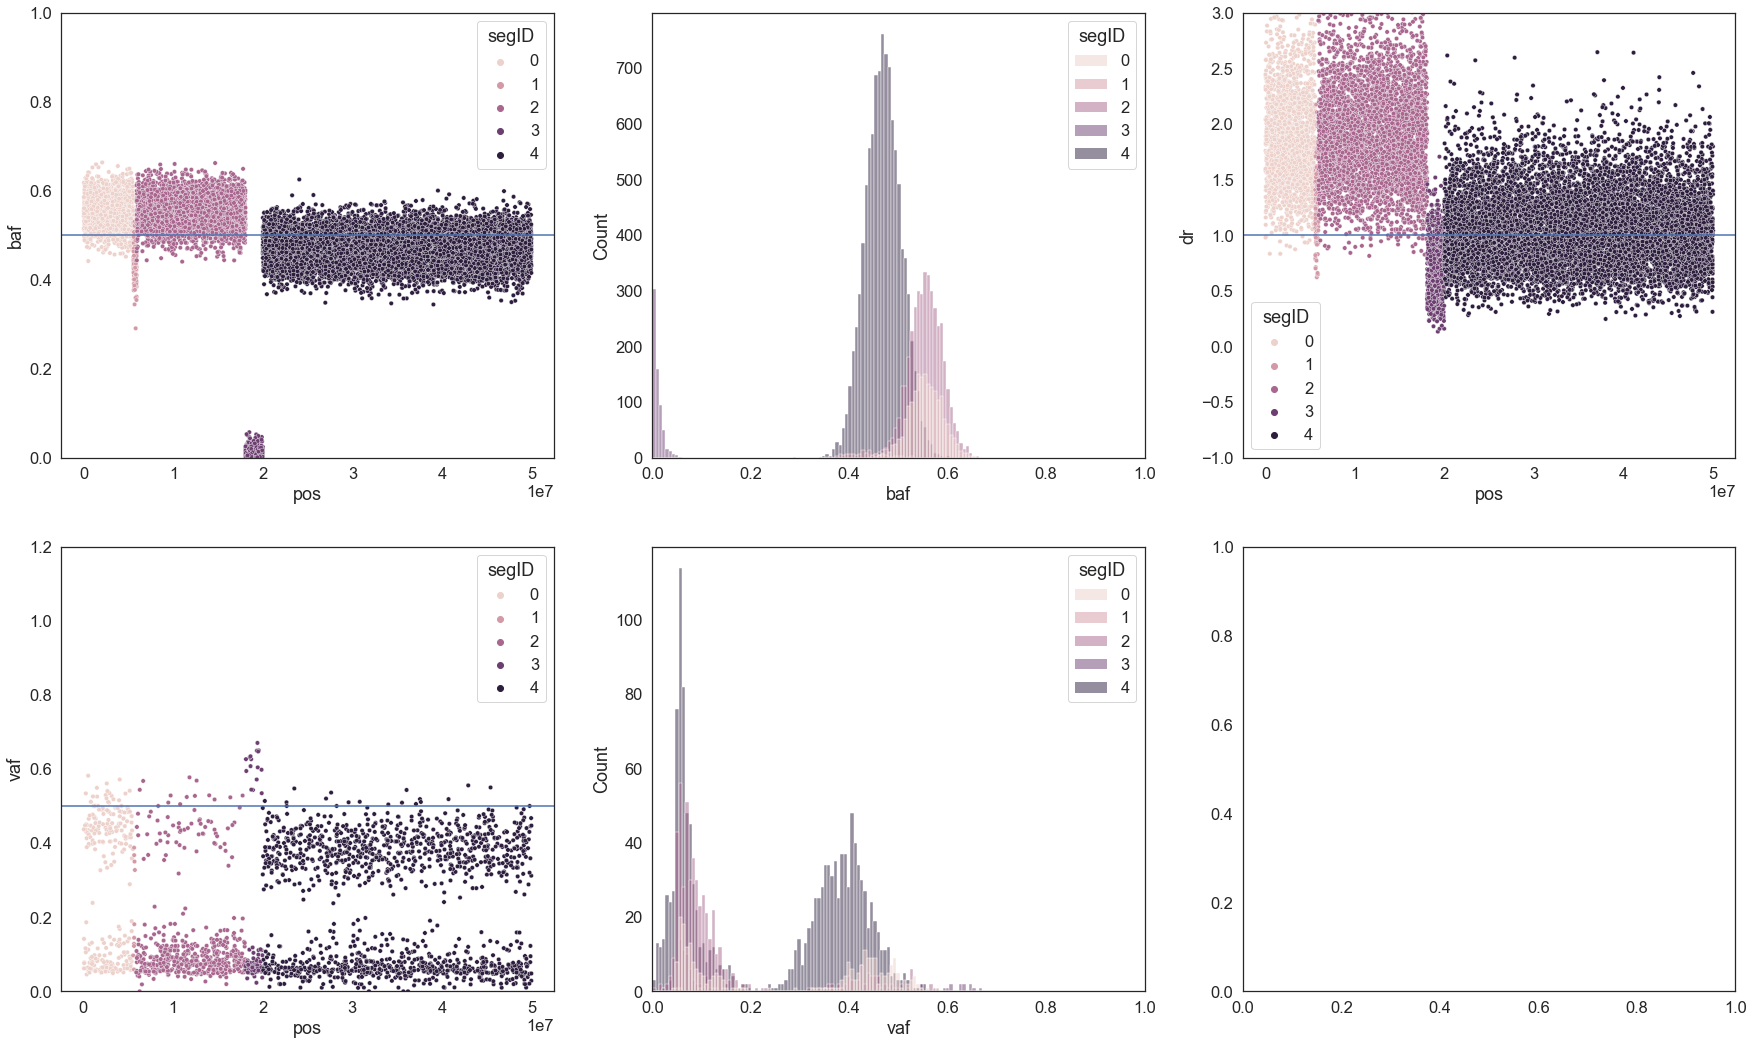

In [7]:
sns.set_theme(style="white", font_scale=1.5)
fig, axes = plt.subplots(2, 3, figsize=(30, 18))

baf = sns.scatterplot(data=SNP, x="pos", y="baf", s=20, ax=axes[0,0], hue="segID")
baf.axhline(0.5)
sns.histplot(data=SNP, x = "baf", ax=axes[0,1], bins = 100, hue="segID")#multiple="stack"

dr = sns.scatterplot(data=SNP, x="pos", y="dr", s=20, ax=axes[0,2], hue="segID")
dr.axhline(1)

vaf = sns.scatterplot(data=SNV, x="pos", y="vaf", s=20, ax=axes[1,0], hue="segID")
vaf.axhline(0.5)
sns.histplot(data=SNV, x = "vaf", ax=axes[1,1], bins = 100, hue="segID")

axes[0,0].set_ylim(0,1)
axes[0,1].set_xlim(0,1)
axes[1,0].set_ylim(0,1.2)
axes[1,1].set_xlim(0,1)
axes[0,2].set_ylim(-1,3) 


<AxesSubplot:xlabel='baf', ylabel='dr'>

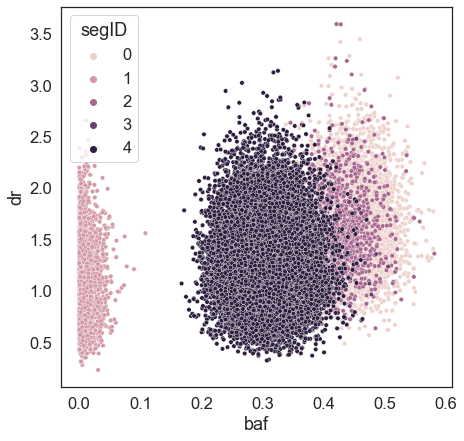

In [23]:
sns.set_theme(style="white", font_scale=1.5)
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

sns.scatterplot(data=SNP, x="baf", y="dr", s=20, hue="segID")